In [1]:
%matplotlib inline
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from random import shuffle
import numpy as np
import plotly.plotly as py
import plotly.figure_factory as ff
from gensim.models import Doc2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import warnings
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
import plotly 
plotly.tools.set_credentials_file(username='savitru', api_key='IfNTymA7gnjN2nEvNWq5')

In [3]:
# Read transcript csv file
interview_transcript = pd.read_csv("../data/notebook3/interview_transcript.csv", sep = '\t')

In [4]:
class LabeledLineSentence(object):
    def __init__(self, sources):
        self.sources = sources

        flipped = {}

        for key, value in  sources.items():
            if value not in flipped:
                flipped[value] = [key]
            else:
                raise Exception('Non-unique prefix encountered')

    def __iter__(self):
        for source, prefix in self.sources.items():
            with utils.smart_open(source) as fin:
                for item_no, line in enumerate(fiin):
                    yield LabeledSentence(utils.to_unicode(line).split(), [prefix + '_%s' % item_no])

    def to_array(self):
        self.sentences = []
        for source, prefix in self.sources.items():
            with utils.smart_open(source) as fin:
                for item_no, line in enumerate(fin):
                    self.sentences.append(LabeledSentence(utils.to_unicode(line).split(), [prefix + '_%s' % item_no]))

        return self.sentences

    def sentences_perm(self):
        shuffle(self.sentences)
        return self.sentences

In [ ]:
def text_to_wordlist(text, remove_stopwords=True, stem_words=False):    
    # Clean the text, with the option to remove stopwords and to stem words.
    
    # Convert words to lower case and split them
    text = text.lower().split()

    # Optionally, remove stop words
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        text = [wordnet_lemmatizer.lemmatize(w) for w in text if not w in stops ]
        text = [w for w in text if w != "nan" ]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    
    text = re.sub(r"\<", " ", text)
    text = re.sub(r"\>", " ", text)
    
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    
    # Return a list of words
    return(text)

In [5]:
sources = {'../data/notebook3/test_neg.txt':'TEST_NEG', '../data/notebook3/test_pos.txt':'TEST_POS', '../data/notebook3/train_neg.txt':'TRAIN_NEG', '../data/notebook3/train_pos.txt':'TRAIN_POS'}

sentences = LabeledLineSentence(sources)
size = 42
model = Doc2Vec(min_cout = 1, window = 10, vector_size = size, sample = 1e-4, negative = 5, workers = 8)
model.build_vocab(sentences.to_array())

model.train(sentences.sentences_perm(), total_examples = model.corpus_count, epochs = 40)

model['TRAIN_NEG_0']

array([ 1.35579538e+00, -8.57675612e-01,  5.61364532e-01,  1.47150695e-01,
        3.65385026e-01, -2.20768857e+00, -3.56315495e-03, -4.56736028e-01,
        2.38886690e+00,  2.44069453e-02,  6.41846359e-01,  5.68148792e-01,
        3.82903785e-01,  1.10313368e+00,  5.31062186e-01, -2.62213206e+00,
       -1.25402224e+00, -8.65598142e-01,  1.02842212e+00, -4.24725962e+00,
        7.63824582e-01,  8.26898992e-01, -1.17841534e-01,  8.80373940e-02,
       -1.09254014e+00,  6.61896765e-01, -9.08259571e-01,  5.23306966e-01,
       -5.09720623e-01,  8.36602807e-01, -2.31675959e+00,  1.72596082e-01,
       -7.18984663e-01, -1.83682323e-01,  3.78251076e-01, -1.33329761e+00,
        1.22297108e+00, -3.24915886e-01,  5.73829234e-01,  1.24388230e+00,
        1.50096107e+00, -2.53488111e+00], dtype=float32)

In [6]:
train_arrays = np.zeros((107, size))
train_labels = np.zeros(107)

for k in range(29):
    prefix_train_pos = 'TRAIN_POS_' + str(k)
    train_arrays[k] = model[prefix_train_pos]
    train_labels[k] = 1

for k in range(78):
    prefix_train_neg = 'TRAIN_NEG_' + str(k)
    train_arrays[29 + k] = model[prefix_train_neg]
    train_labels[29 + k] = 0

test_arrays = np.zeros((35, size))
test_labels = np.zeros(35)

for k in range(12):
    prefix_test_pos = 'TEST_POS_' + str(k)
    test_arrays[k] = model[prefix_test_pos]
    test_labels[k] = 1

for k in range(23):
    prefix_test_neg = 'TEST_NEG_' + str(k)
    test_arrays[12 + k] = model[prefix_test_neg]
    test_labels[12 + k] = 0

In [7]:
np.save('../data/doc/X_train.npy', train_arrays)
np.save('../data/doc/Y_train.npy',train_labels)
np.save('../data/doc/X_test.npy',test_arrays)
np.save('../data/doc/Y_test.npy',test_labels)

In [8]:
def loadDoc():

    X_train, Y_train = np.load('../data/doc/X_train.npy'), np.load('../data/doc/Y_train.npy')
    X_test, Y_test = np.load('../data/doc/X_test.npy'), np.load('../data/doc/Y_test.npy')

    return X_train, Y_train, X_test, Y_test

In [31]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['acc'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper right')
    plt.show()

In [43]:
from sklearn.utils import class_weight
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Flatten, Dropout, Bidirectional, concatenate, Input
from keras.utils import to_categorical
from keras import optimizers
import keras.backend as K
def trainLSTM(X_train, Y_train, X_test, Y_test):
    hyperparams = {'exp': 330, 
                   'timesteps': 7, 
                   'stride': 3, 
                   'lr': 0.01, 
                   'nlayers': 2, 
                   'hsize': 4, 
                   'batchsize': 64, 
                   'epochs': 300, 
                   'momentum': 0.84999999999999998, 
                   'decay': 1.0, 
                   'dropout': 0.10000000000000001, 
                   'dropout_rec': 0.2, 
                   'loss': 'categorical_crossentropy', 
                   'dim': 100, 
                   'min_count': 3, 
                   'window': 3, 
                   'wepochs': 25, 
                   'layertype': 'bi-lstm', 
                   'merge_mode': 'concat', 
                   'dirpath': 'data/LSTM_10/', 
                   'exppath': 'data/LSTM_10/330/', 
                   'text': 'data/Step10/alltext.txt', 
                   'balClass': False}

    # seed generator
    np.random.seed(1337)

    # grab hyperparamters
    exp         = hyperparams['exp']
    batch_size  = hyperparams['batchsize']
    epochs      = hyperparams['epochs']
    lr          = hyperparams['lr']
    hsize       = hyperparams['hsize']
    nlayers     = hyperparams['nlayers']
    loss        = hyperparams['loss']
    dirpath     = hyperparams['dirpath']
    momentum    = hyperparams['momentum']
    decay       = hyperparams['decay']
    dropout     = hyperparams['dropout']
    dropout_rec = hyperparams['dropout_rec']
    merge_mode  = hyperparams['merge_mode']
    layertype   = hyperparams['layertype']
    balClass    = hyperparams['balClass']


    # grab input dimension 
    dim = X_train.shape[1]
    #number of timesteps (i.e. number of interview sequences)
    timesteps = X_train.shape[0]

    cweight = np.array([1, 1])
    
    model = Sequential()
    model.add(Bidirectional(LSTM(hsize, return_sequences=True, recurrent_dropout=dropout_rec,
                   dropout=dropout),input_shape=(dim,1), merge_mode=merge_mode))
    model.add(Bidirectional(LSTM(hsize, return_sequences=True, recurrent_dropout=dropout_rec), merge_mode=merge_mode))
    model.add(Bidirectional(LSTM(hsize, return_sequences=False, recurrent_dropout=dropout_rec), merge_mode=merge_mode))
    
    # add the final output node
    # this check is useful if training a multiclass model
    dsize = 27
    model.add(Dense(dsize, activation='softmax'))
    Y_train = to_categorical(Y_train,num_classes = 27)
    Y_test = to_categorical(Y_test,num_classes = 27)
    print(Y_train.shape)
    # print info on network
    print(model.summary())
    print('--- network has layers:', nlayers, ' hsize:',hsize, ' bsize:', batch_size,
          ' lr:', lr, ' epochs:', epochs, ' loss:', loss)

    # define optimizer
    sgd = optimizers.SGD(lr=lr, momentum=momentum, decay=0, nesterov=True)

    # compile model
    model.compile(loss=loss,optimizer='adam',metrics=['accuracy','mae','mse'])
    
    # train model
    hist = model.fit(X_train, Y_train, epochs=epochs, class_weight=cweight)
    plot_loss(hist);
    plot_acc(hist);
    score = model.evaluate(X_test,Y_test,verbose=2,batch_size=None)
    print('loss: ',score[0])
    print('accu: ',score[1])

(107, 27)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_46 (Bidirectio (None, 42, 8)             192       
_________________________________________________________________
bidirectional_47 (Bidirectio (None, 42, 8)             416       
_________________________________________________________________
bidirectional_48 (Bidirectio (None, 8)                 416       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 9         
_________________________________________________________________
dense_17 (Dense)             (None, 27)                54        
Total params: 1,087
Trainable params: 1,087
Non-trainable params: 0
_________________________________________________________________
None
--- network has layers: 2  hsize: 4  bsize: 64  lr: 0.01  epochs: 300  loss: categorical_crossentropy
Epoch 1/300
107/107 [==

107/107 [==============================] - 1s 8ms/step - loss: 2.9694 - acc: 0.7290 - mean_absolute_error: 0.0703 - mean_squared_error: 0.0346
Epoch 47/300
107/107 [==============================] - 1s 7ms/step - loss: 2.9624 - acc: 0.7290 - mean_absolute_error: 0.0702 - mean_squared_error: 0.0346
Epoch 48/300
107/107 [==============================] - 1s 8ms/step - loss: 2.9554 - acc: 0.7290 - mean_absolute_error: 0.0702 - mean_squared_error: 0.0346
Epoch 49/300
107/107 [==============================] - 1s 7ms/step - loss: 2.9484 - acc: 0.7290 - mean_absolute_error: 0.0702 - mean_squared_error: 0.0345
Epoch 50/300
107/107 [==============================] - 1s 7ms/step - loss: 2.9414 - acc: 0.7290 - mean_absolute_error: 0.0702 - mean_squared_error: 0.0345
Epoch 51/300
107/107 [==============================] - 1s 7ms/step - loss: 2.9345 - acc: 0.7290 - mean_absolute_error: 0.0701 - mean_squared_error: 0.0345
Epoch 52/300
107/107 [==============================] - 1s 8ms/step - loss: 2

107/107 [==============================] - 1s 8ms/step - loss: 2.6170 - acc: 0.7290 - mean_absolute_error: 0.0687 - mean_squared_error: 0.0331
Epoch 99/300
107/107 [==============================] - 1s 8ms/step - loss: 2.6104 - acc: 0.7290 - mean_absolute_error: 0.0686 - mean_squared_error: 0.0331
Epoch 100/300
107/107 [==============================] - 1s 7ms/step - loss: 2.6039 - acc: 0.7290 - mean_absolute_error: 0.0686 - mean_squared_error: 0.0330
Epoch 101/300
107/107 [==============================] - 1s 7ms/step - loss: 2.5975 - acc: 0.7290 - mean_absolute_error: 0.0686 - mean_squared_error: 0.0330
Epoch 102/300
107/107 [==============================] - 1s 7ms/step - loss: 2.5910 - acc: 0.7290 - mean_absolute_error: 0.0685 - mean_squared_error: 0.0330
Epoch 103/300
107/107 [==============================] - 1s 7ms/step - loss: 2.5845 - acc: 0.7290 - mean_absolute_error: 0.0685 - mean_squared_error: 0.0329: 0s - loss: 2.5848 - acc: 0.7292 - mean_absolute_error: 0.0685 - mean_squ

107/107 [==============================] - 1s 9ms/step - loss: 2.2996 - acc: 0.7290 - mean_absolute_error: 0.0666 - mean_squared_error: 0.0313
Epoch 150/300
107/107 [==============================] - 1s 9ms/step - loss: 2.2937 - acc: 0.7290 - mean_absolute_error: 0.0666 - mean_squared_error: 0.0312
Epoch 151/300
107/107 [==============================] - 1s 10ms/step - loss: 2.2879 - acc: 0.7290 - mean_absolute_error: 0.0666 - mean_squared_error: 0.0312
Epoch 152/300
107/107 [==============================] - 1s 8ms/step - loss: 2.2820 - acc: 0.7290 - mean_absolute_error: 0.0665 - mean_squared_error: 0.0312
Epoch 153/300
107/107 [==============================] - 1s 8ms/step - loss: 2.2761 - acc: 0.7290 - mean_absolute_error: 0.0665 - mean_squared_error: 0.0311
Epoch 154/300
107/107 [==============================] - 1s 9ms/step - loss: 2.2703 - acc: 0.7290 - mean_absolute_error: 0.0664 - mean_squared_error: 0.0311
Epoch 155/300
107/107 [==============================] - 1s 8ms/step - 

107/107 [==============================] - 1s 9ms/step - loss: 2.0105 - acc: 0.7290 - mean_absolute_error: 0.0641 - mean_squared_error: 0.0292
Epoch 202/300
107/107 [==============================] - 1s 10ms/step - loss: 2.0054 - acc: 0.7290 - mean_absolute_error: 0.0641 - mean_squared_error: 0.0292
Epoch 203/300
107/107 [==============================] - 1s 9ms/step - loss: 2.0002 - acc: 0.7290 - mean_absolute_error: 0.0640 - mean_squared_error: 0.0291
Epoch 204/300
107/107 [==============================] - 1s 11ms/step - loss: 1.9950 - acc: 0.7290 - mean_absolute_error: 0.0640 - mean_squared_error: 0.0291
Epoch 205/300
107/107 [==============================] - 2s 18ms/step - loss: 1.9899 - acc: 0.7290 - mean_absolute_error: 0.0639 - mean_squared_error: 0.0290
Epoch 206/300
107/107 [==============================] - 1s 13ms/step - loss: 1.9848 - acc: 0.7290 - mean_absolute_error: 0.0639 - mean_squared_error: 0.0290
Epoch 207/300
107/107 [==============================] - 1s 10ms/ste

107/107 [==============================] - 1s 8ms/step - loss: 1.7597 - acc: 0.7290 - mean_absolute_error: 0.0613 - mean_squared_error: 0.0270
Epoch 254/300
107/107 [==============================] - 1s 8ms/step - loss: 1.7553 - acc: 0.7290 - mean_absolute_error: 0.0612 - mean_squared_error: 0.0270
Epoch 255/300
107/107 [==============================] - 1s 9ms/step - loss: 1.7509 - acc: 0.7290 - mean_absolute_error: 0.0612 - mean_squared_error: 0.0269
Epoch 256/300
107/107 [==============================] - 1s 8ms/step - loss: 1.7465 - acc: 0.7290 - mean_absolute_error: 0.0611 - mean_squared_error: 0.0269
Epoch 257/300
107/107 [==============================] - 1s 8ms/step - loss: 1.7421 - acc: 0.7290 - mean_absolute_error: 0.0611 - mean_squared_error: 0.0268
Epoch 258/300
107/107 [==============================] - 1s 11ms/step - loss: 1.7377 - acc: 0.7290 - mean_absolute_error: 0.0610 - mean_squared_error: 0.0268
Epoch 259/300
107/107 [==============================] - 1s 8ms/step - 

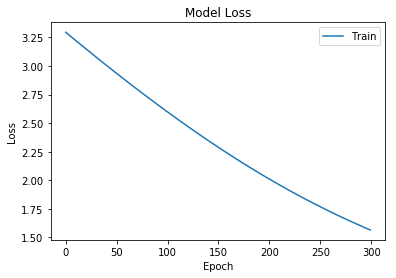

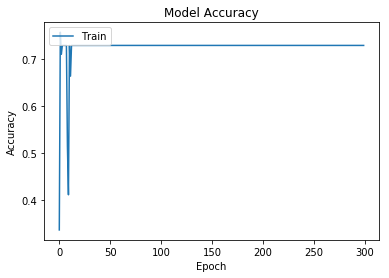

loss:  1.577791837283543
accu:  0.6571428571428571


In [44]:
X_train, Y_train, X_test, Y_test = loadDoc()

X_train = X_train.reshape(len(X_train),len(X_train[0]),1)
X_test = X_test.reshape(len(X_test),len(X_test[0]),1)

trainLSTM(X_train, Y_train, X_test, Y_test)